## Assignment 3
#### Injamuri Krutika, M.Tech C.S, 18MCMT20


### Question 1:

#### K Means Clustering

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA

In [2]:
def k_means_clustering(X, k):
    initial_centroids = X[np.random.choice(X.shape[0],k,replace = False)]
    centroids = initial_centroids.copy()
    distance_matrix = np.zeros((centroids.shape[0],X.shape[0]))
    minimum_dist_matrix = np.zeros((centroids.shape[0],X.shape[0]))
    prev_minimum_dist_matrix = np.ones((centroids.shape[0],X.shape[0]))
    iterations = 0
    while(np.array_equal(minimum_dist_matrix, prev_minimum_dist_matrix) == False):
        iterations += 1
        prev_minimum_dist_matrix = np.copy(minimum_dist_matrix)
        minimum_dist_matrix = np.zeros((centroids.shape[0],X.shape[0]))
        distance_matrix = np.zeros((centroids.shape[0],X.shape[0]))
        for i,centroid in enumerate(centroids):
            distance_matrix[i] = np.sqrt(np.sum((X-centroid)**2,axis=1))

        for i,j in enumerate(np.argmin(distance_matrix,axis=0)):
            minimum_dist_matrix[j][i] = 1

        for i in range(k):
            data_points = X[np.where(minimum_dist_matrix[i] == 1)]
            if data_points.size:
                centroids[i] = np.mean(data_points,axis = 0)
                
    print("Total Iterataions: ",iterations)
    return initial_centroids, centroids, np.array([X[minimum_dist_matrix[i] == 1] for i in range(k)])

In [3]:
def plot_clusters(clusters, centroids_new,title):
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(clusters[0][:, 0], clusters[0][:, 1], clusters[0][:, 2], c="r")
    ax.scatter(clusters[1][:, 0], clusters[1][:, 1], clusters[1][:, 2], c="g")
    ax.scatter(clusters[2][:, 0], clusters[2][:, 1], clusters[2][:, 2], c="b")
    ax.scatter(centroids_new[:, 0], centroids_new[:, 1], centroids_new[:, 2], c="m", marker="x")
    plt.title(title)
    plt.show()

### Iris Dataset

In [28]:
iris_dataset = np.genfromtxt("data/iris.csv",delimiter=",")
iris_dataset = iris_dataset[:,:4]
pca = PCA(n_components=3)
pca.fit(iris_dataset)
iris_dataset = pca.transform(iris_dataset)
centroids, centroids_new, clusters = k_means_clustering(iris_dataset, 3)
print("Old Centroids: ",centroids, sep="\n")
print("New Centroids: ",centroids_new, sep="\n")


Total Iterataions:  8
Old Centroids:  [[ 0.8072055   0.19505396  0.38945871]
 [ 2.3875644   0.46251925 -0.45202396]
 [ 2.16537886  0.21528028  0.03314818]]
New Centroids:  [[-2.64084076  0.19051995  0.01299584]
 [ 2.37438946  0.2614839   0.04970951]
 [ 0.67443933 -0.31390945 -0.04094764]]


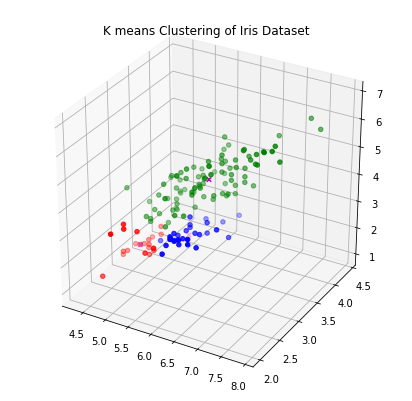

In [5]:
plot_clusters(clusters, centroids_new,"K means Clustering of Iris Dataset")

### Cancer Dataset

In [31]:
file = open('data/arcene_train.data')
X = np.array([list(map(int, file.readline().strip().split(' '))) for _ in range(100)])
pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
# X = X[:,:3]
centroids, centroids_new, clusters = k_means_clustering(X, 3)
print("Old Centroids: ",centroids, sep="\n")
print("New Centroids: ",centroids_new, sep="\n")


Total Iterataions:  3
Old Centroids:  [[-6493.38815771 -1907.66641463  -226.83391586]
 [ 1016.04903263  6662.75923145  -256.36303418]
 [  948.38920186  7061.14035149   200.89120991]]
New Centroids:  [[-6255.59490293 -1655.97252257  -145.51717616]
 [ 5530.24263611 -2383.26696011    91.8452749 ]
 [  957.962761    6777.14640444    84.68204229]]


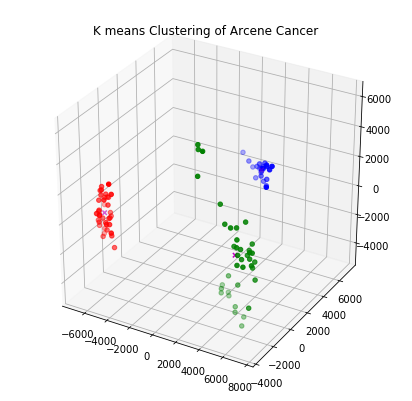

In [32]:
plot_clusters(clusters, centroids_new,"K means Clustering of Arcene Cancer")

### Kernel K Means

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


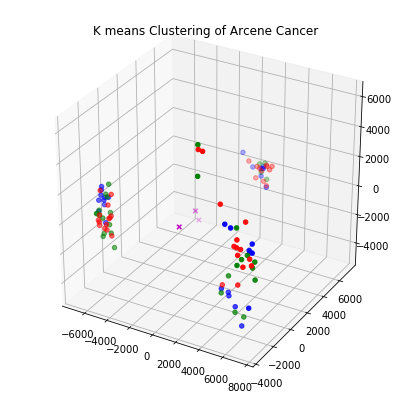

In [48]:
k = 3
clustering = SpectralClustering(n_clusters=k,assign_labels="discretize",random_state=0).fit_predict(X)
# clustering = SpectralClustering(n_clusters=k,assign_labels="discretize",random_state=0).fit_predict(iris_dataset[:100,:])

clusters = np.array([X[clustering == i] for i in range(k)])
centroids_new = np.array([np.mean(clusters[i],axis=0) for i in range(k)])
plot_clusters(clusters, centroids_new,"K means Clustering of Arcene Cancer")